### Екзаменаційна робота 
#### З дисципліни: Нейронні мережі
#### студента групи АнД-41 
#### Іваніни Сави
#### Варіант - 5
#### Завдання:
#### Розробити Jupyter Notebook для вирішення завдання класифікації на основі наборів даних:
#### #1 - https://keras.io/api/datasets/cifar10/


#### #2 - https://drive.google.com/drive/folders/15MdqvRMl8YPFCbemyiLdUcX5SL4A5mx2?usp=sharing
#### Забезпечити виконання наступних етапів:
#### 1. Завантаження та попередній аналіз даних.
#### 2. Вирішення завдання класифікації для набору даних #1 з використанням Feed-forward NN.
#### 2+.(для отримання оцінки "добре") +CNN.
#### 3. Вирішення завдання класифікації для набору даних #2 з використанням:
####    3.1. CNN (Кількість фільтрів: 5, Метод оптимізації: Adam)
####    3.2. Моделі Resnet репозиторію Tensorflow Hub
#### 4.(для отримання оцінки "відмінно", за умови виконання п.2+) 
####     Здійснити точне настроювання моделі 3.2 з використанням: Learning rate fine-tuning           
#### 5. Графічне відображення тренування моделей.
#### 6. Порівняння отриманих результатів для набору даних #2.
#### 7. Висновки.

In [123]:
import tensorflow as tf
import tensorflow.keras.datasets 
from tensorflow import keras
import tensorflow_hub as hub
import datetime

ModuleNotFoundError: No module named 'tensorflow_hub'

In [2]:
tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 144s 1us/step


((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [85]:
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.cifar10.load_data()


In [86]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

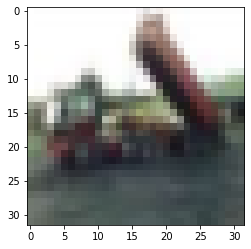

In [87]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2]);

In [88]:
y_train[2]

array([9], dtype=uint8)

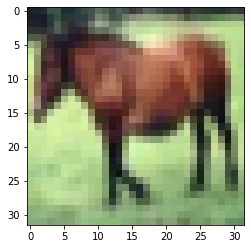

In [89]:
import matplotlib.pyplot as plt
plt.imshow(x_train[7]);

In [90]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [91]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']
len(class_names)

10

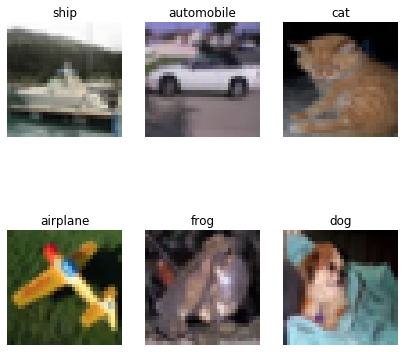

In [92]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(6):
  ax = plt.subplot(2, 3, i + 1)
  rand_index = random.choice(range(len(x_train)))
  plt.imshow(x_train[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[y_train[rand_index][0]])
  plt.axis(False)

In [93]:
var_names = { 0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 
               5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

In [101]:
x_train = tf.map_fn(lambda image: tf.image.per_image_standardization(image), x_train, dtype=tf.float32)
x_train = tf.Session().run(x_train)
x_test = tf.map_fn(lambda image: tf.image.per_image_standardization(image), x_test, dtype=tf.float32)
x_test = tf.Session().run(x_test)

AttributeError: module 'tensorflow' has no attribute 'Session'

In [94]:
# Divide train and test images by the maximum value (normalize it)
x_norm_train = x_train / x_train.max()
x_norm_test = x_test / x_train.max()

# Check the min and max values of the training data
x_norm_train.min(), x_norm_train.max()

(0.0, 1.0)

In [95]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(x_norm_train,
                               y_train,
                               epochs=20, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(x_norm_test, y_test),
                               callbacks=[lr_scheduler])

Epoch 1/20
1563/1563 [==============================] - 7s 2ms/step - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 2/20
1563/1563 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0971 - val_loss: 2.3026 - val_accuracy: 0.1000 - lr: 0.0011
Epoch 3/20
1563/1563 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0013
Epoch 4/20
1563/1563 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0014
Epoch 5/20
1563/1563 [==============================] - 3s 2ms/step - loss: 2.3029 - accuracy: 0.0994 - val_loss: 2.3026 - val_accuracy: 0.1000 - lr: 0.0016
Epoch 6/20
1563/1563 [==============================] - 3s 2ms/step - loss: 2.3029 - accuracy: 0.0994 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0018
Epoch 7/20
1563/1563 [==============================] - 3s

In [96]:
import pandas as pd
find_lr_history_df = pd.DataFrame(find_lr_history.history)
optimal_lr = find_lr_history_df.loc[find_lr_history_df['loss'].idxmin()]['lr']

In [97]:
# Optimal model
model_opt = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(12, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_opt.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=optimal_lr),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                  metrics=['accuracy'])

# Fit the model
history = model_opt.fit(x_norm_train,
                        y_train,
                        epochs=20,
                        validation_data=(x_norm_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 4s 2ms/step - loss: 2.3029 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/20
1563/1563 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0965 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/20
1563/1563 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/20
1563/1563 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0991 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/20
1563/1563 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0998 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/20
1563/1563 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/20
1563/1563 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy:

In [102]:
import pathlib
import numpy as np
data_dir = pathlib.Path("data1/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['Fire' 'Non-Fire']


In [114]:
train_path = 'data1/train'
test_path = 'data1/train'
IMAGE_SIZE = (224, 224)
img_classes = os.listdir(train_path)
img_classes

['Fire', 'Non-Fire']